In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

import numpy as np
from sklearn.impute import SimpleImputer

In [2]:
census = pd.read_csv('../data/census.csv')
census.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   final-weight    32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loos    32561 non-null  int64 
 12  hour-per-week   32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
############ Replace NaN for most-frequent values of each column ############
 
imp_mean = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_mean.fit(census)
census = pd.DataFrame(data=imp_mean.transform(census), columns=census.columns)
# census.head()

In [5]:
# sns.pairplot(census, hue='income')
classe = census['income']
prev = census.drop('income', axis='columns')
columns = prev.columns

In [6]:
############ Conversão de variáveis qualitativas para quantitativas ############
############ -> Não é necessário se usar o ColumnTransformer ############

prev_number = prev.values
categorical = [1, 3, 5, 6, 7, 8, 9, 13]

le = LabelEncoder()
for i in categorical:
    prev_number[:, i]=le.fit_transform(prev_number[:, i])
    
prev_number = pd.DataFrame(data = prev_number, columns = columns)
prev_number.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5


In [7]:
############ escalonamento ############
scaler = StandardScaler()
scaled_number = pd.DataFrame(scaler.fit_transform(prev_number))

scaled_number.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.030671,2.150579,-1.063611,-0.335437,1.134739,0.921634,-1.317809,-0.277805,0.393668,0.703071,0.148453,-0.21666,-0.035429,0.291569
1,0.837109,1.463736,-1.008707,-0.335437,1.134739,-0.406212,-0.608387,-0.900181,0.393668,0.703071,-0.145920,-0.21666,-2.222153,0.291569
2,-0.042642,0.090050,0.245079,0.181332,-0.420060,-1.734058,-0.135438,-0.277805,0.393668,0.703071,-0.145920,-0.21666,-0.035429,0.291569
3,1.057047,0.090050,0.425801,-2.402511,-1.197459,-0.406212,-0.135438,-0.900181,-1.962621,0.703071,-0.145920,-0.21666,-0.035429,0.291569
4,-0.775768,0.090050,1.408176,-0.335437,1.134739,-0.406212,0.810458,2.211698,-1.962621,-1.422331,-0.145920,-0.21666,-0.035429,-4.054223


In [8]:
############ Conversão de variáveis qualitativas para quantitativas ############


from sklearn.compose import ColumnTransformer
categorical = [1, 3, 5, 6, 7, 8, 9, 13]
prev_encoded = census.drop('income',axis = 1)
old_names = prev_encoded.columns[categorical]

column_transformer = ColumnTransformer([('one_hot_encoder', OneHotEncoder(), categorical)])
prev_encoded = column_transformer.fit_transform(prev_encoded).toarray()

column_names = column_transformer.get_feature_names()


for i in range(len(old_names)):
    column_names = [sub.replace('one_hot_encoder__x' + str(i) +'_ ', old_names[i] + '_') for sub in column_names] 

prev_encoded = pd.DataFrame(prev_encoded)
prev_encoded.columns = column_names
prev_encoded.head()

,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
############ escalonamento ############
scaler = StandardScaler()
scaled_encoded = pd.DataFrame(scaler.fit_transform(prev_encoded.values))
scaled_encoded.columns = column_names

scaled_encoded.head()

,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,-0.24445,-0.174295,-0.262097,-0.014664,-1.516792,-0.188389,-0.290936,4.907700,-0.02074,-0.171753,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.340954,-0.045408,-0.022173
1,-0.24445,-0.174295,-0.262097,-0.014664,-1.516792,-0.188389,3.437186,-0.203761,-0.02074,-0.171753,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.340954,-0.045408,-0.022173
2,-0.24445,-0.174295,-0.262097,-0.014664,0.659286,-0.188389,-0.290936,-0.203761,-0.02074,-0.171753,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.340954,-0.045408,-0.022173
3,-0.24445,-0.174295,-0.262097,-0.014664,0.659286,-0.188389,-0.290936,-0.203761,-0.02074,-0.171753,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.340954,-0.045408,-0.022173
4,-0.24445,-0.174295,-0.262097,-0.014664,0.659286,-0.188389,-0.290936,-0.203761,-0.02074,-0.171753,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,-2.932948,-0.045408,-0.022173


In [10]:
############ Salvando as variáveis #############
scaled_encoded.to_csv('../data/previsores_census.csv', index=False)
classe.to_csv('../data/classe_census.csv', index=False)

In [11]:
############ Divisão entre base de treino e teste ############

# previsores = prev_number # Label encoder
# previsores = scaled_number # Label encoder + scaler
# previsores = prev_encoded # One Hot encoder
previsores = scaled_encoded # One Hot encoder + scaler

X_train, X_test, y_train, y_test = train_test_split(previsores, classe, test_size=0.33, random_state=42)

In [12]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

Acurácia: 0.400893355667225


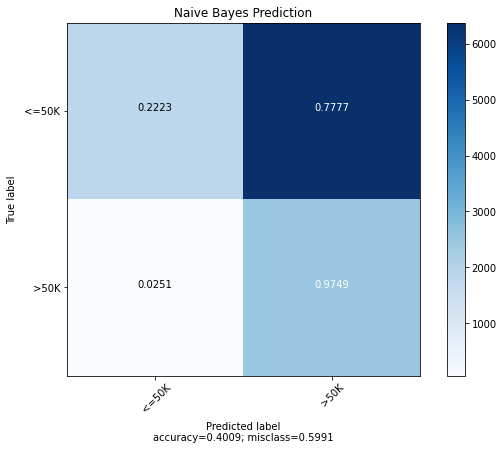

In [13]:
############## Naive Bayes ##############

from sklearn.naive_bayes import GaussianNB
classificador = GaussianNB()
classificador.fit(X_train, y_train)
previsoes = classificador.predict(X_test)
acuracia = accuracy_score(y_test, previsoes)
cm = confusion_matrix(y_test, previsoes)

print('Acurácia: ' + str(acuracia))
plot_confusion_matrix(cm, classe.unique(), title='Naive Bayes Prediction', cmap=plt.cm.Blues )

Acurácia: 0.8136050623487809


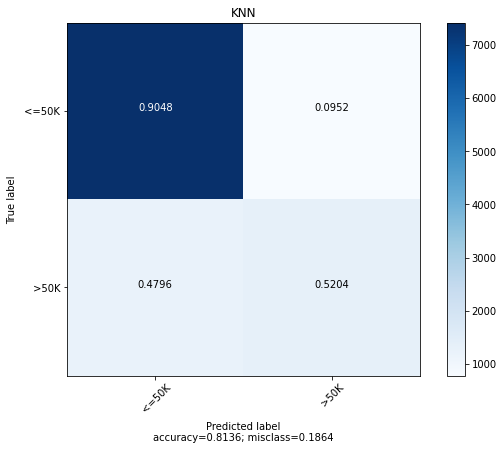

In [14]:
############## KNN #################

from sklearn.neighbors import KNeighborsClassifier
classificador = KNeighborsClassifier()
classificador.fit(X_train, y_train)
previsoes = classificador.predict(X_test)

acuracia = accuracy_score(y_test, previsoes)
cm = confusion_matrix(y_test, previsoes)

print('Acurácia: ' + str(acuracia))
plot_confusion_matrix(cm, classe.unique(), title='KNN', cmap=plt.cm.Blues )

Acurácia: 0.8301693653452448


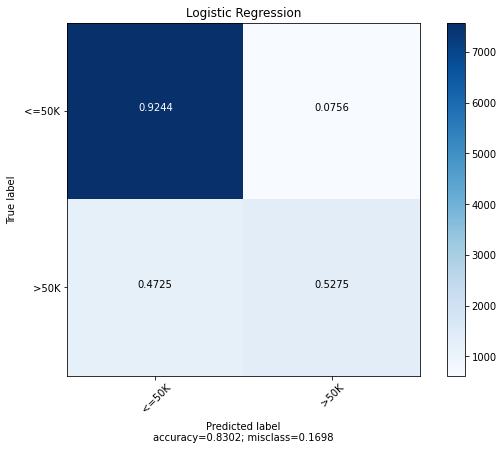

In [15]:
################ LogisticRegression ################
from sklearn.linear_model import LogisticRegression

classificador = LogisticRegression(solver='lbfgs')
classificador.fit(X_train, y_train)
previsoes = classificador.predict(X_test)

acuracia = accuracy_score(y_test, previsoes)
cm = confusion_matrix(y_test, previsoes)

print('Acurácia: ' + str(acuracia))
plot_confusion_matrix(cm, classe.unique(), title='Logistic Regression', cmap=plt.cm.Blues )

acuracia: 0.8111855574167132


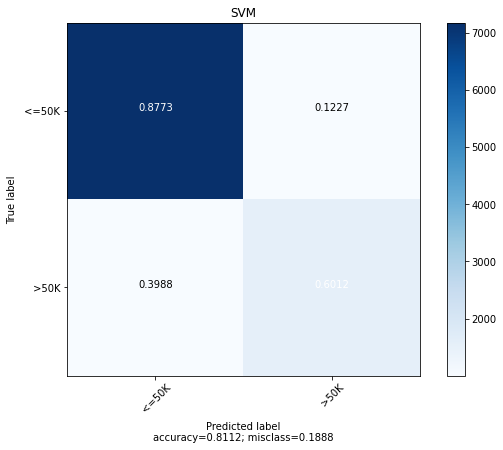

In [16]:
################ SVM ################

from sklearn.svm import SVC
classificador = SVC(kernel='linear', random_state=1, gamma='auto', C=0.5)
classificador.fit(X_train, y_train)
previsoes = classificador.predict(X_test)

acuracia = accuracy_score(previsoes, y_test)
cm = confusion_matrix(previsoes, y_test)

print('acuracia: ' + str(acuracia))
plot_confusion_matrix(cm, classe.unique(), title='SVM', cmap=plt.cm.Blues )